## Allen Coral Data

In [1]:
import geopandas as gpd
#gbr data from allen coral
data = gpd.read_file("gbr_benthic.gpkg")
data.head()

,class,geometry
0,Rubble,"POLYGON ((147.06005 -18.61624, 147.06023 -18.6..."
1,Rubble,"POLYGON ((147.06072 -18.61646, 147.06090 -18.6..."
2,Rock,"POLYGON ((147.05668 -18.61682, 147.05673 -18.6..."
3,Coral/Algae,"POLYGON ((147.05718 -18.61844, 147.05736 -18.6..."
4,Sand,"POLYGON ((147.05646 -18.62010, 147.05664 -18.6..."


In [2]:
#Find the center point
data['centroid'] = data['geometry'].centroid
#Extract lat and lon from the centerpoint
data["lat"] = data.centroid.map(lambda p: p.x)
data["long"] = data.centroid.map(lambda p: p.y)

<ipython-input-2-a20855aa39cd>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['centroid'] = data['geometry'].centroid
<ipython-input-2-a20855aa39cd>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["lat"] = data.centroid.map(lambda p: p.x)
<ipython-input-2-a20855aa39cd>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["long"] = data.centroid.map(lambda p: p.y)


In [4]:
data.to_csv('gbr_allenCoral.csv')

In [5]:
gbr_atlas=data

In [6]:
#caribbean data from allen coral
#southeatern caribbean data + northern caribbean data separate to be concatinated
southCar = gpd.read_file("southCar_benthic.gpkg")
northCar = gpd.read_file("northCar_benthic.gpkg")

In [9]:
import pandas as pd
car_atlas = pd.concat([southCar,northCar])

In [13]:
#Find the center point
car_atlas['centroid'] = car_atlas['geometry'].centroid
#Extract lat and lon from the centerpoint
car_atlas["lat"] = car_atlas.centroid.map(lambda p: p.x)
car_atlas["long"] = car_atlas.centroid.map(lambda p: p.y)

<ipython-input-13-9c258e30ddeb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  car_atlas['centroid'] = car_atlas['geometry'].centroid
<ipython-input-13-9c258e30ddeb>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  car_atlas["lat"] = car_atlas.centroid.map(lambda p: p.x)
<ipython-input-13-9c258e30ddeb>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  car_atlas["long"] = car_atlas.centroid.map(lambda p: p.y)


In [14]:
data.to_csv('car_allenCoral.csv')

In [22]:
car_atlas.head(5)

,class,geometry,centroid,lat,long
0,Seagrass,"POLYGON ((-64.32485 10.95684, -64.32476 10.956...",POINT (-64.32480 10.95680),-64.324802,10.956804
1,Seagrass,"POLYGON ((-64.31493 10.95648, -64.31479 10.956...",POINT (-64.31486 10.95646),-64.314860,10.956460
2,Rubble,"POLYGON ((-64.31973 10.95671, -64.31969 10.956...",POINT (-64.31973 10.95651),-64.319726,10.956510
3,Seagrass,"POLYGON ((-64.31578 10.95657, -64.31569 10.956...",POINT (-64.31556 10.95643),-64.315560,10.956425
4,Rubble,"POLYGON ((-64.31497 10.95608, -64.31493 10.956...",POINT (-64.31495 10.95606),-64.314950,10.956055


## GCBD

In [31]:
gcbd=pd.read_csv("meshedGCBD.csv",index_col=0)
gcbd["long_lat"] = list(zip(gcbd["Longitude_Degrees"], gcbd["Latitude_Degrees"]))
gcbd.head(5)

,Latitude_Degrees,Longitude_Degrees,Date,Percent_Bleached_Sum,Percent_Cover_Sum,long_lat
708,-18.54635,146.48803,2002-02-15,5.0,NaN,"(146.48803, -18.54635)"
709,-18.54635,146.48803,2002-02-15,5.0,NaN,"(146.48803, -18.54635)"
711,-18.54628,146.48752,2002-02-15,5.0,NaN,"(146.48752, -18.54628)"
712,-18.44480,146.99328,2002-02-15,37.5,NaN,"(146.99328, -18.4448)"
713,-18.44432,146.99333,2002-02-15,37.5,NaN,"(146.99333, -18.44432)"


/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



Text(0.5, 1.0, 'Distribution of Global Coral Bleaching Database Data')

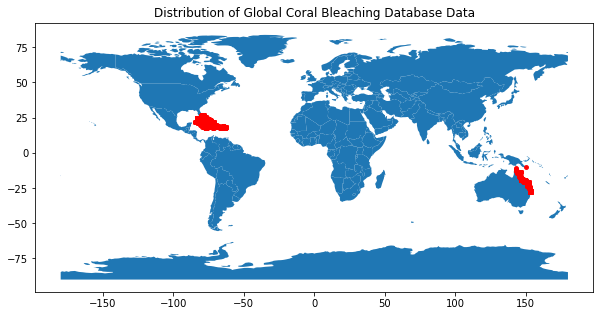

In [38]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(gcbd['Longitude_Degrees'], gcbd['Latitude_Degrees'])]
gdf = GeoDataFrame(gcbd, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.title("Distribution of Global Coral Bleaching Database Data")

In [47]:
yearly=gcbd.groupby(['Date']).count()
yearly

,Latitude_Degrees,Longitude_Degrees,Percent_Bleached_Sum,Percent_Cover_Sum,long_lat,geometry
Date,,,,,,
2000-01-15,1,1,1,0,1,1
2000-06-12,2,2,2,0,2,2
2000-06-15,2,2,2,0,2,2
2000-07-17,3,3,3,0,3,3
2000-08-04,11,11,11,0,11,11
...,...,...,...,...,...,...
2018-06-22,1,1,1,1,1,1
2018-08-25,1,1,1,1,1,1
2018-09-26,1,1,1,1,1,1


Text(0.5, 1.0, 'Great Barrier Reef Data Distribution')

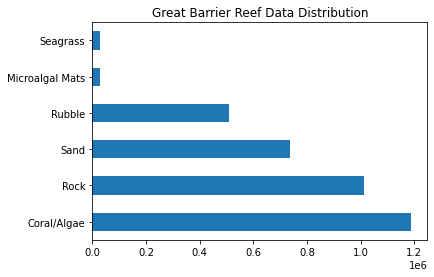

In [50]:
# Plot frequency
gbr_atlas['class'].value_counts().plot.barh()
plt.title("Great Barrier Reef Data Distribution")

Text(0.5, 1.0, 'Caribbean Data Distribution')

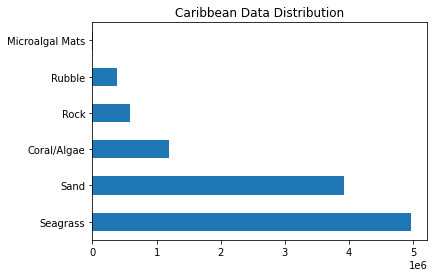

In [53]:
# Plot frequency
car_atlas['class'].value_counts().plot.barh()
plt.title("Caribbean Data Distribution")

In [55]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(car_atlas,lat='lat',lon='long')
fig.update_layout(title = 'Allen Coral Atlas Data Distribution - Caribbean', title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Date Distribution of Bleeching Data (GCBD)')

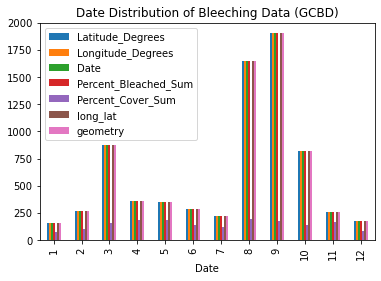

In [60]:
# Plot frequency
gcbd["Date"] = gcbd["Date"].astype("datetime64")

gcbd.groupby(gcbd["Date"].dt.month).count().plot(kind="bar")
plt.title("Date Distribution of Bleeching Data (GCBD)")